## **1) Import Required Libraries**

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from matplotlib.image import imread
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D, BatchNormalization
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
import cv2
import keras
np.random.seed(20)

## **2) Data preprocessing**


In [8]:
#read the file
df=pd.read_csv(cat_and_dog.csv)

In [ ]:
# unzip train.zip - train2
# unzip test1.zip - test2

In [2]:
training_images_folder = "train/train"
testing_images_folder = "test/test1"

In [ ]:
# load training images into a DataFrame (train_df)

filenames = os.listdir(training_images_folder)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


### *2.1) Explore training dataframe (train_df)*

In [ ]:
train_df.shape

(25000, 2)

In [ ]:
train_df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [ ]:
# Check total amount of cat images and dog images labels

train_df['category'].value_counts()

0    12500
1    12500
Name: category, dtype: int64

In [ ]:
train_df['category'].value_counts().plot.bar()

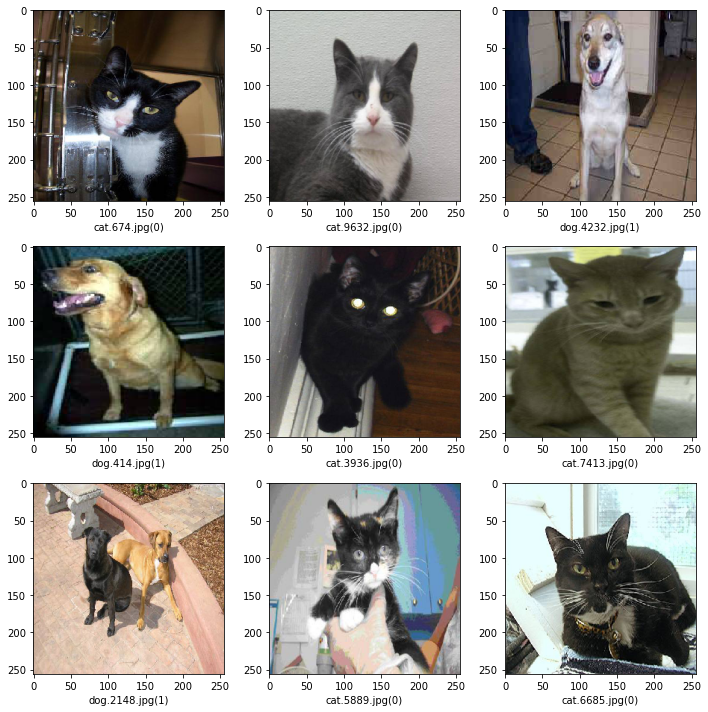

In [ ]:
# print sample images of the training images
sample_train = train_df.sample(n=9).reset_index()
sample_train.head()
plt.figure(figsize=(10, 10))
for index, row in sample_train .iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(training_images_folder +'/'+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

### *2.2) Explore testing dataframe (test_df)*

In [ ]:
# load testing images into a DataFrame (test_df)

filenames = os.listdir(testing_images_folder)
categories = []
for filename in filenames:
    categories.append(0)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [ ]:
test_df.head()

,filename,category
0,1.jpg,0
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,0
4,10000.jpg,0


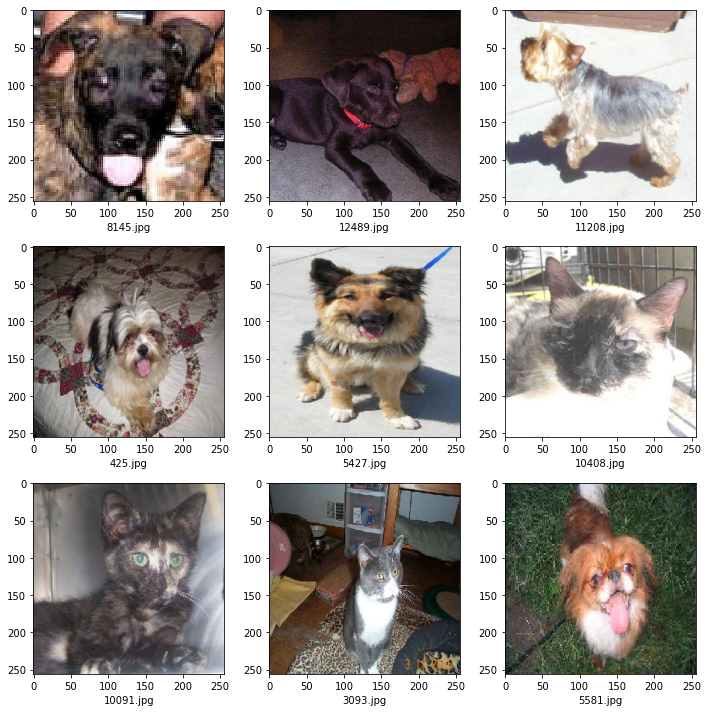

In [ ]:
# print sample images of the testing images
sample_test = test_df.sample(n=9).reset_index()
plt.figure(figsize=(10, 10))
for index, row in sample_test.iterrows():
    filename = row['filename']
    img = load_img(testing_images_folder +'/'+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename)
plt.tight_layout()
plt.show()

## **3) Prepare Data for the Models**

### *3.1) split training data into training set and validation set*

In [ ]:
train_set, validate_set = train_test_split(train_df, test_size=0.1)
train_set = train_set.reset_index()
validate_set = validate_set.reset_index()
total_train_data = train_set.shape[0]
total_validate_data = validate_set.shape[0]

In [ ]:
# Number of trainig images
total_train_data 

22500

In [ ]:
# Number of Validation images
total_validate_data

2500

## **4) Models**


I will try different models and explore each one of them separately
- Pre-trained Models :

1.   ResNet
2.   VGG

### *4.1) ResNet*

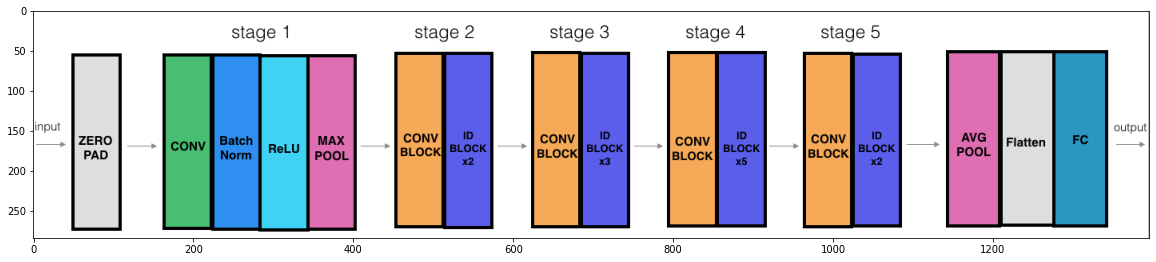

In [26]:
resnet = cv2.imread('Resnet.png')
plt.figure(figsize = (20,20))
plt.imshow(resnet)
plt.show()


In [ ]:
# import model from keras 
from tensorflow.keras.applications.resnet50 import ResNet50

# Define model
model_resnet = Sequential()
# Add pre-trained weights
model_resnet.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
# The last dense layer must specify the number of labels (or classes) and activation f-n
model_resnet.add(Dense(1, activation='softmax'))
# Since we load pre-trained model we must specify first layer as non-trainable
model_resnet.layers[0].trainable = True

# Compile model
model_resnet.compile(
    optimizer='sgd', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Print models summary
model_resnet.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
print(len(ResNet50(input_shape=input_shape,include_top=False, pooling='max', weights='imagenet').layers))


176


In [ ]:
# Train Model
resent_history = model_resnet.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=total_validate_data//batch_size,
    steps_per_epoch=total_train_data//batch_size)

Epoch 1/10
1406/1406 [==============================] - 498s 348ms/step - loss: nan - accuracy: 0.4992 - val_loss: nan - val_accuracy: 0.4952
Epoch 2/10
1406/1406 [==============================] - 407s 289ms/step - loss: nan - accuracy: 0.4928 - val_loss: nan - val_accuracy: 0.4948
Epoch 3/10
1406/1406 [==============================] - 435s 310ms/step - loss: nan - accuracy: 0.4991 - val_loss: nan - val_accuracy: 0.4948
Epoch 4/10
1406/1406 [==============================] - 411s 292ms/step - loss: nan - accuracy: 0.5086 - val_loss: nan - val_accuracy: 0.4948
Epoch 5/10
1406/1406 [==============================] - 427s 304ms/step - loss: nan - accuracy: 0.5045 - val_loss: nan - val_accuracy: 0.4944
Epoch 6/10
1406/1406 [==============================] - 417s 297ms/step - loss: nan - accuracy: 0.4974 - val_loss: nan - val_accuracy: 0.4948
Epoch 7/10
1406/1406 [==============================] - 407s 289ms/step - loss: nan - accuracy: 0.4972 - val_loss: nan - val_accuracy: 0.4944
Epoch 

In [ ]:
loss, accuracy = model_resnet.evaluate_generator(validation_generator, total_validate_data//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.494792  ;  loss = nan 


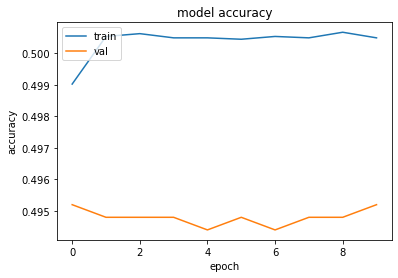

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(resent_history.history['accuracy'])
plt.plot(resent_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### *4.2) VGG*

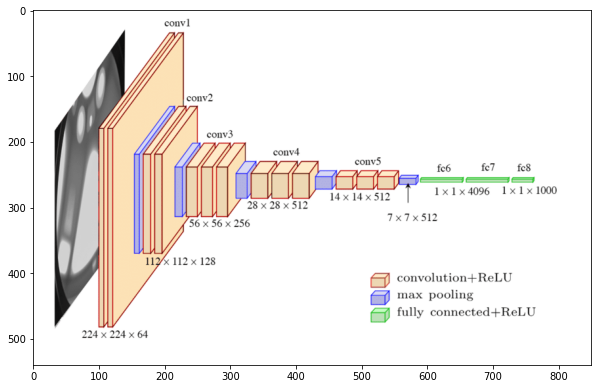

In [27]:
resnet = cv2.imread('vgg.png')
plt.figure(figsize = (10,20))
plt.imshow(resnet)
plt.show()


In [ ]:
# import Pre_trained VGG16 from keras


vgg_pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

# the first 15 layer will not be trainable (already pretrained)
for layer in vgg_pre_trained_model.layers[:15]:
    layer.trainable = False

# the rest of the layers will trainable (to be specific for our use case )
for layer in vgg_pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = vgg_pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
# x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

vgg_model = Model(vgg_pre_trained_model.input, x)

vgg_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# fine-tune the model
vgg_history = vgg_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=total_validate_data//batch_size,
    steps_per_epoch=total_train_data//batch_size)

Epoch 1/5
1406/1406 [==============================] - 289s 200ms/step - loss: 0.3706 - accuracy: 0.8367 - val_loss: 0.1180 - val_accuracy: 0.9575
Epoch 2/5
1406/1406 [==============================] - 309s 219ms/step - loss: 0.1349 - accuracy: 0.9462 - val_loss: 0.0940 - val_accuracy: 0.9623
Epoch 3/5
1406/1406 [==============================] - 341s 242ms/step - loss: 0.1105 - accuracy: 0.9552 - val_loss: 0.0899 - val_accuracy: 0.9655
Epoch 4/5
1406/1406 [==============================] - 522s 371ms/step - loss: 0.0960 - accuracy: 0.9625 - val_loss: 0.0814 - val_accuracy: 0.9679
Epoch 5/5
1406/1406 [==============================] - 610s 434ms/step - loss: 0.0908 - accuracy: 0.9639 - val_loss: 0.0760 - val_accuracy: 0.9708


In [ ]:
loss, accuracy = vgg_model.evaluate_generator(validation_generator, total_validate_data//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.970753  ;  loss = 0.075958 


In [ ]:
def plot_Accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

In [ ]:
def plot_loss(history):
    # plot training and validation loss vs Number of epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

 Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

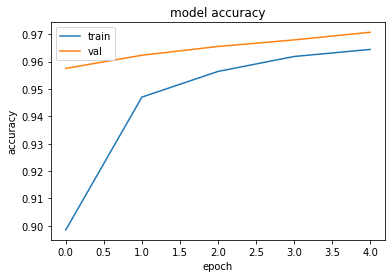

In [ ]:
plot_Accuracy(vgg_history)

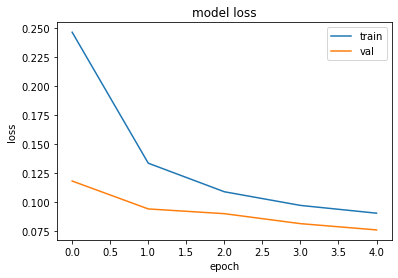

In [ ]:
plot_loss(vgg_history)

As you can see, the trainig and validation accuracy is getting increaded by epochs at first then it somehow saturates and this because the the trainable parameters is less than pre-trained parameter, so at first learning is very high, and the trainable parameters are getting trained, then by epochs the learning rate is getting low

## **5) Testing**


I will test our best model (vgg_model) on the testing set


### *5.1) get the predictions*

In [ ]:
# predict the labels of the testing images

predict = vgg_model.predict(test_generator)

In [ ]:
predict.shape

(12500, 1)

In [ ]:
threshold = 0.5
test_df['Category'] = np.where(predict > threshold, 1,0)

### *5.2) Explore the testing images and thier predicted labels*

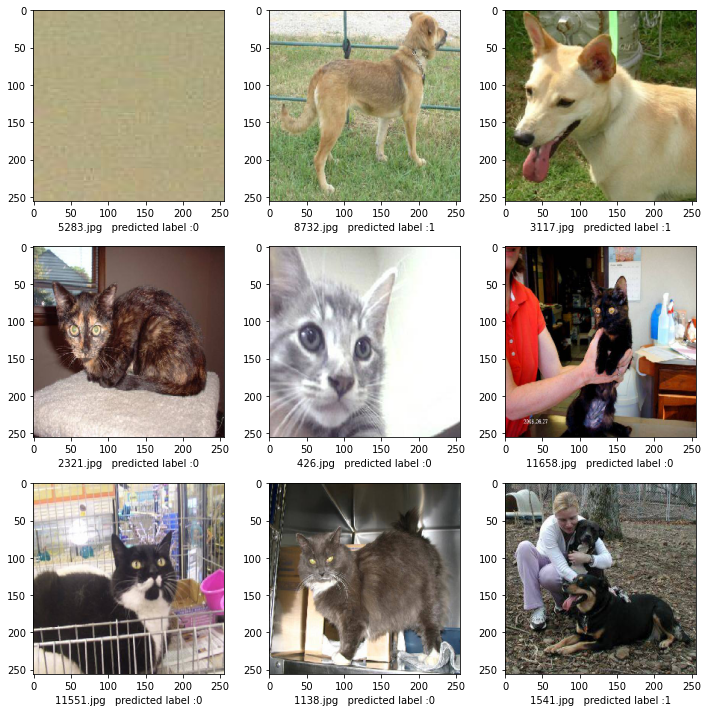

In [ ]:
# print sample images of the testing images

sample_test = test_df.sample(n=9).reset_index()
plt.figure(figsize=(10, 10))
for index, row in sample_test.iterrows():
    filename = row['filename']
    label = row['Category']
    img = load_img(testing_images_folder +'/'+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(str(filename) + '   predicted label :'+str(label))
plt.tight_layout()
plt.show()